In [17]:
import pandas as pd
import numpy as np
import spacy
from gensim.models import word2vec
import matplotlib.pyplot as plt
import warnings
from sklearn.manifold import TSNE
import gensim.downloader as api
import re
warnings.filterwarnings("ignore")
_adhd_notes_file = 'dataframe_output/adhd_sm.csv'

In [ ]:
adf = pd.read_csv(_adhd_notes_file)

# Spacy entity extraction
#for i in range(0, len(adf)):
for i in range(0,1):
    sentence = adf.loc[i][4]
    doc = nlp(sentence)

    tokens = doc.text.split()
    tk_clean = [token.orth_ for token in doc if not token.is_punct | token.is_space]
    #print(tk_clean)

    tk_lemma = [token.lemma_ for token in doc if not token.is_punct | token.is_space]

    tk_ent = [ent.text for ent in doc.ents]

    for ent in doc.ents:
        print(f"{ent.text} | {ent.label_}")


In [ ]:

nlp = en_core_sci_md.load()
for j in range(0,1):
    sentence = adf.loc[j][4]
    doc = nlp(sentence)
    for i in range(0,1):
        displacy.render(doc, style="ent", jupyter=True)

In [ ]:

#
# # get vec for each sentence
#
# model = Word2Vec(corpus, min_count=1)
#
# # for sent in corpus:
#
# sp = corpus[1].text.split()
# token_without_punct = []
# for i in range(len(sp)):
#   token_without_punct.append([token.orth_ for token in sp[i] if not token.is_punct | token.is_space])
#   print(token_without_punct[-1])
#
# word_vect = [model.wv[word] for word in corpus[1]]
#
# pca = PCA(n_components=2)
# word_vect_2d = pca.fit_transform(word_vect)
#
# plt.scatter(word_vect_2d[:,0], word_vect_2d[:,1])
# plt.grid()
# plt.show()

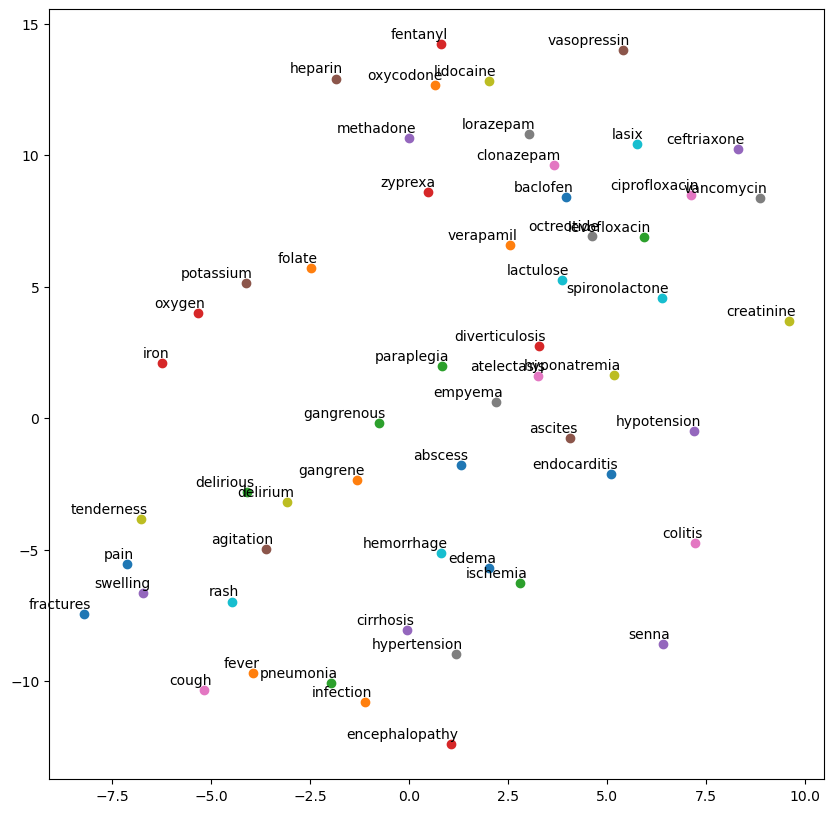

In [18]:
def plot_vectors(model, words, use_wv=True, map_size=(16,16)):
    labels = []
    tokens = []

    for word in words:
        if use_wv:
            if word in model.wv:
                tokens.append(model.wv[word])
                labels.append(word)
            else:
                print(f"skipping {word}")
        else:
            if word in model:
                tokens.append(model[word])
                labels.append(word)
            else:
                print(f"skipping {word}")

    tnse_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tnse_model.fit_transform(np.array(tokens))

    x = [value[0] for value in new_values]
    y = [value[1] for value in new_values]

    plt.figure(figsize=map_size)
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy=(x[i],y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

df = pd.read_csv(_adhd_notes_file, quotechar='"')
#print(df.head())
adf = df['text'].astype(str).tolist()
#print(adf[:5])
nlp = spacy.load("en_ner_bc5cdr_md")


# build corpus
corpus = []
for row in range(0, len(adf)):
    str_tokens=[]
    tokens = nlp(adf[row]).ents
    for token in tokens:
        clean_token = token.text.strip()
        clean_token = re.sub(r"^a-zA-Z0-9-]", "", clean_token)

        if clean_token:
            str_tokens.append(clean_token)
    corpus.append(list(str_tokens))

model = word2vec.Word2Vec(corpus, min_count=1)

map_size = (10,10)
vocabs = model.wv.index_to_key
new_v = np.array(list(vocabs))
#plot_vectors(model, new_v, map_size=map_size)

info = api.info()
pretrained_model = api.load("glove-wiki-gigaword-50")

n_cor = []
for word in new_v:
    if word in pretrained_model.key_to_index:
        n_cor.append(word)
    else:
        pass

plot_vectors(pretrained_model, n_cor, use_wv=False, map_size=map_size)


# Loading notes as described in lecture


In [19]:
notes = []
with open(_adhd_notes_file, 'r') as file:
    lines = file.readlines()
    for line in lines:
        notes.append(line)

# print(len(notes))
# print(notes)

import en_core_sci_md
import en_core_sci_lg
import en_ner_bionlp13cg_md
nlp = en_core_sci_md.load()
nlp = en_core_sci_lg.load()
nlp = en_ner_bionlp13cg_md.load()

doc = []
for i in range(len(notes)):
    doc.append(nlp(notes[i]))
    # for ent in doc[-1].ents:
    #     print(f"{ent.text} | {ent.label_}")
    # print("--------------------")

from spacy import displacy
for i in range(1,2):
    displacy.render(doc[i], style="ent", jupyter=True)
    print("--------------------")

--------------------
